In [1]:
using ControlSystems
using Polynomials
using Plots

In [2]:
PlossT = 0.5;
n = 0.1;
Vin = 230 * sqrt(2);
Pout = 100;
Vout = 12;
fs = 2500;
k = 0.01;
Rp = 0.001;
Rs = 0.0001;
Lm = 5e-3;
Cf = 15e-3;
D0 = roots(Polynomial([Vout, Rs * Pout / Vout - n * Vin - 2 * Vout, (n^2 * Rp - Rs) * Pout / Vout + n * Vin + Vout]))[1];
Req = D0 * Rp + (1 - D0) * Rs / n^2;

In [3]:
A = [(-D0*Req/Lm) (-(1 - D0)/(n*Lm)); (1-D0)/(n*Cf) 0]

2×2 Matrix{Float64}:
  -0.408271  -1460.99
 486.997         0.0

In [4]:
B = [0 D0/Lm (((1-D0)*Vin-n*Req*Pout/Vout)/(Lm*(1-D0)^2)); -1/Cf 0 -Pout/(Vout*Cf*(1-D0))]

2×3 Matrix{Float64}:
   0.0     53.901  89052.1
 -66.6667   0.0     -760.519

In [5]:
C = [0 1]

1×2 Matrix{Int64}:
 0  1

In [6]:
D = [0 0 0]

1×3 Matrix{Int64}:
 0  0  0

In [7]:
sys = ss(A, B, C, D)

StateSpace{Continuous, Float64}
A = 
  -0.40827087177365895  -1460.9896643586512
 486.9965547862171          0.0
B = 
   0.0               53.90103356413487  89052.09571331607
 -66.66666666666667   0.0                -760.5194877260609
C = 
 0.0  1.0
D = 
 0.0  0.0  0.0

Continuous-time state-space model

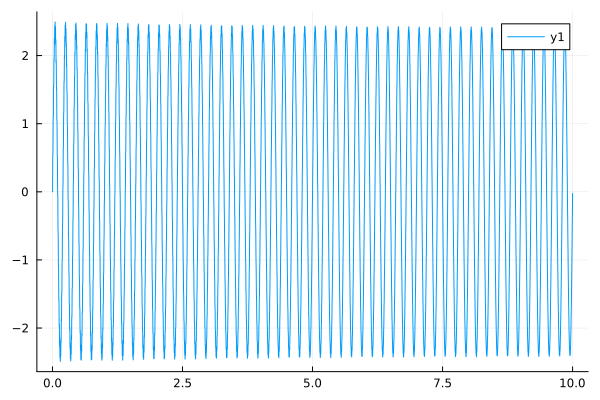

In [8]:
t = 0:0.0005:10;
u1 = zeros(1, length(t))
u2 = 0.2 * Vin * sin.(2 * pi * 5 * t')
u3 = zeros(1, length(t))
u = [u1; u2; u3]
y, _ = lsim(sys, u, t)
plot(t, y')

In [9]:
G = tf(sys)

TransferFunction{Continuous, ControlSystemsBase.SisoRational{Float64}}
Input 1 to output 1
    -66.66666666666667s - 27.218058118247427
-------------------------------------------------
1.0s^2 + 0.40827087177365895s + 711496.9331209348

Input 2 to output 1
               26249.617645149934
-------------------------------------------------
1.0s^2 + 0.40827087177365895s + 711496.9331209348

Input 3 to output 1
    -760.5194877260609s + 4.336775331092312e7
-------------------------------------------------
1.0s^2 + 0.40827087177365895s + 711496.9331209348

Continuous-time transfer function model

In [17]:
z, p, k = zpkdata(G[1, 1])
p

1×1 Matrix{Vector{ComplexF64}}:
 [-0.20413543588682945 + 843.5027512994006im, -0.20413543588682945 - 843.5027512994006im]